In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
clusters = pd.read_csv('csomclusters.csv').iloc[:,1:]
clusters.columns = ['gmm','gmm prob0','gmm prob1','gmm prob2','kmeans']

In [38]:
res=pd.read_csv('res.csv')

In [52]:
data = pd.concat([res,clusters],axis=1)
k_features=data[['SW','phie','GR','RHOB','ILD','kmeans']]
g_features=data[['SW','phie','GR','RHOB','ILD','gmm']]
kmeans = data['kmeans']
gmm = data['gmm']

In [56]:
#cluster stats
kmeans_c = data['kmeans'].unique()
k_stat=[0]*len(kmeans_c)
for i,k in enumerate(kmeans_c):
    slc=data.loc[data['kmeans'] == k]
    sw = np.mean(slc['SW'])
    ph = np.mean(slc['phie'])
    rhob = np.mean(slc['RHOB'])
    gr = np.mean(slc['GR'])
    ild = np.mean(slc['ILD'])
    count = len(slc)
    stat=[sw,ph,rhob,gr,ild,count]
    k_stat[i]=stat
k_stat=pd.DataFrame(k_stat)
k_stat.columns=['SW','PHIE','RHOB','GR','ILD','N']

gmm_c = data['gmm'].unique()
gmm_stat=[0]*len(gmm_c)
for i,k in enumerate(gmm_c):
    slc=data.loc[data['gmm'] == k]
    sw = np.mean(slc['SW'])
    ph = np.mean(slc['phie'])
    rhob = np.mean(slc['RHOB'])
    gr = np.mean(slc['GR'])
    ild = np.mean(slc['ILD'])
    count = len(slc)
    stat=[sw,ph,rhob,gr,ild,count]
    gmm_stat[i]=stat
gmm_stat=pd.DataFrame(gmm_stat)
gmm_stat.columns=['SW','PHIE','RHOB','GR','ILD','N']

#gmm_stat.to_csv('gmm_stat.csv')
#k_stat.to_csv('kmeans_stat.csv')

In [57]:
gmm_stat

,SW,PHIE,RHOB,GR,ILD,N
0,0.709877,0.164498,2453.547924,51.964819,3.434264,219425
1,0.580615,0.215170,2370.844070,30.931568,7.738270,125532
2,0.352410,0.238887,2322.954329,38.361758,451.010622,123262


In [58]:
k_stat

,SW,PHIE,RHOB,GR,ILD,N
0,0.463549,0.214752,2347.234262,54.025963,291.382518,191565
1,0.716819,0.161882,2479.418123,41.294249,3.525562,158179
2,0.590030,0.217819,2367.408626,26.439860,7.943221,118475


In [59]:
n_to_plot=2000
njump=int(len(res)/n_to_plot)

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


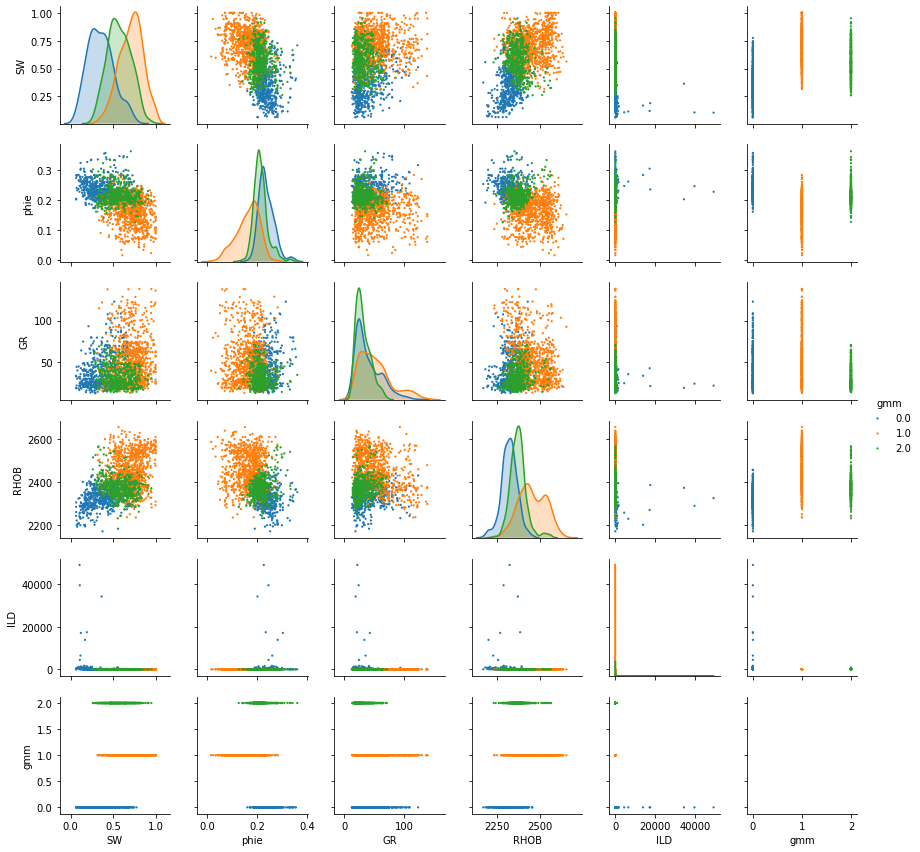

In [60]:
sns.pairplot(g_features[::njump],height=2,plot_kws={"s": 20,"marker":'.',"edgecolor":"none"},hue='gmm')

D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


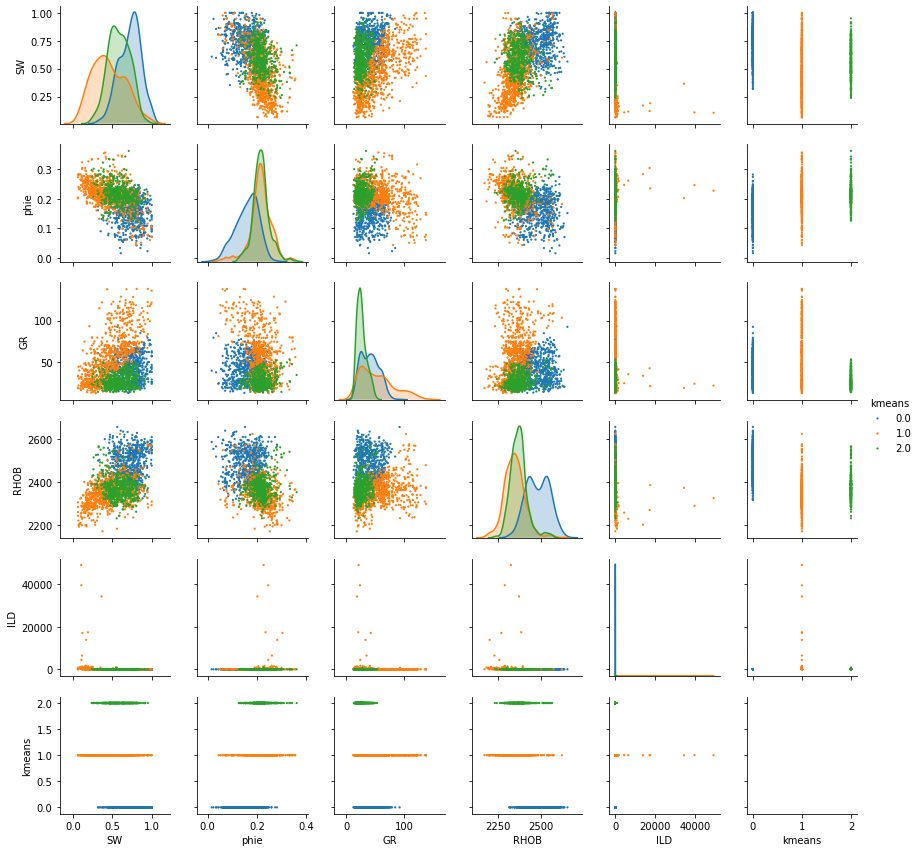

In [61]:
sns.pairplot(k_features[::njump],height=2,plot_kws={"s": 20,"marker":'.',"edgecolor":"none"},hue='kmeans')